In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("تم استيراد المكتبات بنجاح!")


تم استيراد المكتبات بنجاح!


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
شكل بيانات التدريب (الصور): (60000, 28, 28)
شكل بيانات التدريب (التصنيفات): (60000,)
شكل بيانات الاختبار (الصور): (10000, 28, 28)
شكل بيانات الاختبار (التصنيفات): (10000,)


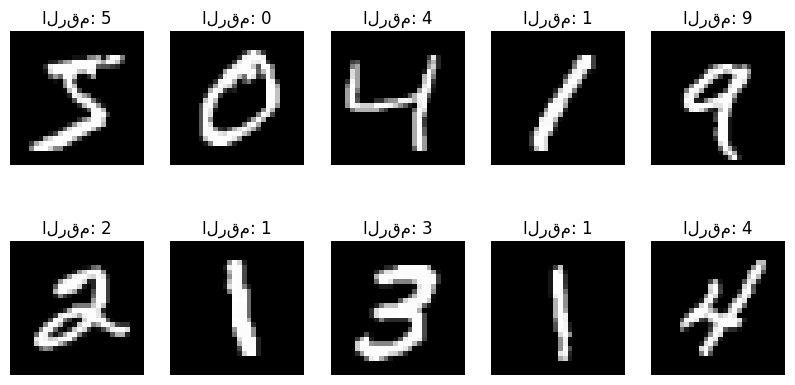

In [2]:
# تحميل مجموعة بيانات MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# طباعة أبعاد البيانات لفهمها بشكل أفضل
print("شكل بيانات التدريب (الصور):", x_train.shape) # (60000 صورة، كل صورة 28x28 بكسل)
print("شكل بيانات التدريب (التصنيفات):", y_train.shape) # (60000 تصنيف)
print("شكل بيانات الاختبار (الصور):", x_test.shape)   # (10000 صورة، كل صورة 28x28 بكسل)
print("شكل بيانات الاختبار (التصنيفات):", y_test.shape)   # (10000 تصنيف)

# عرض بعض الصور من بيانات التدريب لمعرفة شكلها
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"الرقم: {y_train[i]}")
    plt.axis('off')
plt.show()

In [3]:
# 1. تطبيع قيم البكسل لتكون بين 0 و 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. تحويل التصنيفات إلى صيغة One-Hot Encoding
# لدينا 10 أرقام (من 0 إلى 9)
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print("تمت معالجة البيانات بنجاح!")
print("شكل تصنيفات التدريب بعد التحويل:", y_train.shape)
print("مثال على تصنيف محول (للرقم 5):", y_train[5])

تمت معالجة البيانات بنجاح!
شكل تصنيفات التدريب بعد التحويل: (60000, 10)
مثال على تصنيف محول (للرقم 5): [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [4]:
# بناء النموذج
model = tf.keras.Sequential([
    # طبقة لتحويل الصورة 28x28 إلى متجه 784
    tf.keras.layers.Flatten(input_shape=(28, 28)),

    # طبقة مخفية بها 128 خلية عصبية ودالة تنشيط ReLU
    tf.keras.layers.Dense(128, activation='relu'),

    # طبقة Dropout لمنع الإفراط في التخصيص (Overfitting)
    tf.keras.layers.Dropout(0.2),

    # طبقة الإخراج بها 10 خلايا عصبية (للأرقام 0-9) ودالة تنشيط Softmax
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# عرض ملخص النموذج
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# تجميع النموذج
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("تم تجميع النموذج بنجاح!")

تم تجميع النموذج بنجاح!


In [6]:

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_test, y_test))

print("اكتمل تدريب النموذج!")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8108 - loss: 0.6577 - val_accuracy: 0.9452 - val_loss: 0.1973
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9394 - loss: 0.2109 - val_accuracy: 0.9560 - val_loss: 0.1430
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9578 - loss: 0.1484 - val_accuracy: 0.9669 - val_loss: 0.1099
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9663 - loss: 0.1162 - val_accuracy: 0.9720 - val_loss: 0.0942
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9699 - loss: 0.0988 - val_accuracy: 0.9724 - val_loss: 0.0885
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9733 - loss: 0.0865 - val_accuracy: 0.9751 - val_loss: 0.0794
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9768 - loss: 0.0758 - val_accuracy: 0.9759 - val_loss: 0.0792
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9787 - loss: 0.0703 - val_accuracy: 0

In [8]:
loss, accuracy = model.evaluate(x_test, y_test)

print(f"\nدقة النموذج على بيانات الاختبار: {accuracy * 100:.2f}%")
print(f"معدل الخسارة على بيانات الاختبار: {loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9755 - loss: 0.0801

دقة النموذج على بيانات الاختبار: 97.91%
معدل الخسارة على بيانات الاختبار: 0.0674


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


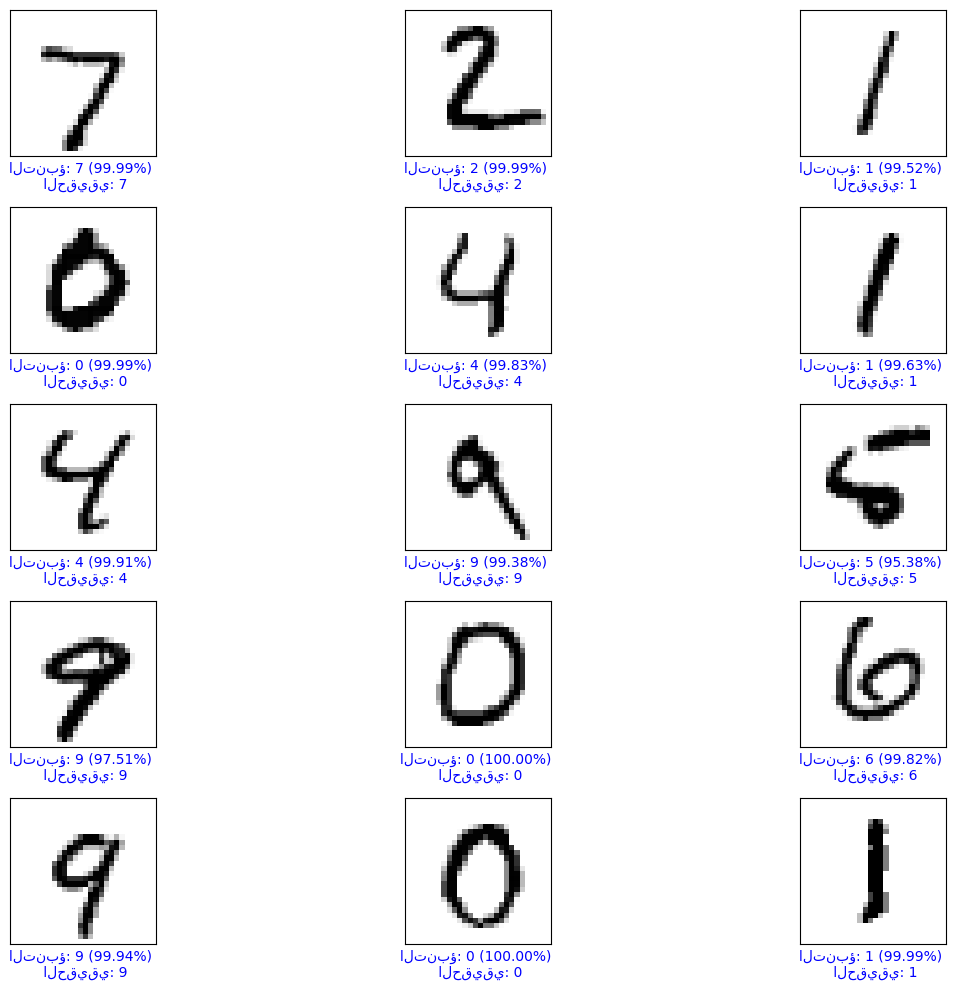

In [9]:
predictions = model.predict(x_test)

def plot_prediction(i, predictions_array, true_label, img):
    true_label, img = np.argmax(true_label), img
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'  # تنبؤ صحيح
    else:
        color = 'red'   # تنبؤ خاطئ

    plt.xlabel(f"التنبؤ: {predicted_label} ({100*np.max(predictions_array):.2f}%) \n الحقيقي: {true_label}", color=color)

# عرض أول 15 صورة من بيانات الاختبار مع تنبؤات النموذج
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_prediction(i, predictions[i], y_test[i], x_test[i])
plt.tight_layout()
plt.show()